## Reference

https://github.com/tensorflow/models/blob/master/object_detection/object_detection_tutorial.ipynb

## Installation

### Download protobuf compiler
https://github.com/google/protobuf/releases/download/v3.4.0/protoc-3.4.0-linux-x86_64.zip

In [1]:
import urllib.request

data_url = "https://github.com/google/protobuf/releases/download/v3.4.0/protoc-3.4.0-linux-x86_64.zip"
local_filepath = "/tmp/protoc-3.4.0-linux-x86_64.zip"

urllib.request.urlretrieve(data_url, local_filepath)

% ls /tmp/protoc-3.4.0-linux-x86_64.zip

/tmp/protoc-3.4.0-linux-x86_64.zip


### Unzip protobuf compiler

In [2]:
from zipfile import ZipFile

def unzip(src, dest):
    with ZipFile(src, 'r') as myzip:
        myzip.extractall(path=dest)

unzip(local_filepath, '/tmp/protobuf')

% ls -al /tmp/protobuf/bin

total 4296
drwxr-xr-x 2 root root      19 Aug 24 09:56 ./
drwxr-xr-x 4 root root      47 Aug 24 09:56 ../
-rw-r--r-- 1 root root 4396888 Aug 24 09:56 protoc


## Set Path

In [3]:
import sys

protoc_path = "/tmp/protobuf/bin/protoc"
proto_src = "object_detection/protos/*.proto" # fixed relative path in proto files

proto_dir = "/tmp/protobuf/protos_python"

path_to_add = [
                  proto_dir,
               ]

for path in path_to_add:
    if path in sys.path:
        continue
        
    sys.path.append(path) 

In [4]:
sys.path

['',
 '/usr/local/lib/python35.zip',
 '/usr/local/lib/python3.5',
 '/usr/local/lib/python3.5/plat-linux',
 '/usr/local/lib/python3.5/lib-dynload',
 '/usr/local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/site-packages/IPython/extensions',
 '/root/.ipython',
 '/tmp/protobuf/protos_python']

### Compile required protobuf Python Wappers

In [5]:
import os
import stat
import subprocess

# make it executable
os.chmod(protoc_path, stat.S_IRWXU)

# make dest folder
try:
    os.makedirs(proto_dir)
except:
    pass

pwd = os.getcwd()

os.chdir("..")
commands = [protoc_path, proto_src, "--python_out={}".format(proto_dir)]
command_str = ' '.join(commands)
print(command_str)

p = subprocess.Popen(command_str, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
out, err = p.communicate()

print(out)
print(err)
os.chdir(pwd)

% ls -al /tmp/protobuf/protos_python/object_detection/protos/

/tmp/protobuf/bin/protoc object_detection/protos/*.proto --python_out=/tmp/protobuf/protos_python
b''
b''
total 336
drwxr-xr-x 2 root root  4096 Aug 24 09:56 ./
drwxr-xr-x 3 root root    19 Aug 24 09:56 ../
-rw-r--r-- 1 root root  4310 Aug 24 09:56 anchor_generator_pb2.py
-rw-r--r-- 1 root root  3926 Aug 24 09:56 argmax_matcher_pb2.py
-rw-r--r-- 1 root root  1741 Aug 24 09:56 bipartite_matcher_pb2.py
-rw-r--r-- 1 root root  5135 Aug 24 09:56 box_coder_pb2.py
-rw-r--r-- 1 root root 18435 Aug 24 09:56 box_predictor_pb2.py
-rw-r--r-- 1 root root  6780 Aug 24 09:56 eval_pb2.py
-rw-r--r-- 1 root root  3445 Aug 24 09:56 faster_rcnn_box_coder_pb2.py
-rw-r--r-- 1 root root 17829 Aug 24 09:56 faster_rcnn_pb2.py
-rw-r--r-- 1 root root  5082 Aug 24 09:56 grid_anchor_generator_pb2.py
-rw-r--r-- 1 root root 21219 Aug 24 09:56 hyperparams_pb2.py
-rw-r--r-- 1 root root  6995 Aug 24 09:56 image_resizer_pb2.py
-rw-r--r-- 1 root root  8613 Aug 24 09:56 input_reader_pb2.py
-rw-r--r-- 1 root root 24453 Au

In [6]:
% ls -al /tmp/protobuf/protos_python/object_detection/protos

total 336
drwxr-xr-x 2 root root  4096 Aug 24 09:56 ./
drwxr-xr-x 3 root root    19 Aug 24 09:56 ../
-rw-r--r-- 1 root root  4310 Aug 24 09:56 anchor_generator_pb2.py
-rw-r--r-- 1 root root  3926 Aug 24 09:56 argmax_matcher_pb2.py
-rw-r--r-- 1 root root  1741 Aug 24 09:56 bipartite_matcher_pb2.py
-rw-r--r-- 1 root root  5135 Aug 24 09:56 box_coder_pb2.py
-rw-r--r-- 1 root root 18435 Aug 24 09:56 box_predictor_pb2.py
-rw-r--r-- 1 root root  6780 Aug 24 09:56 eval_pb2.py
-rw-r--r-- 1 root root  3445 Aug 24 09:56 faster_rcnn_box_coder_pb2.py
-rw-r--r-- 1 root root 17829 Aug 24 09:56 faster_rcnn_pb2.py
-rw-r--r-- 1 root root  5082 Aug 24 09:56 grid_anchor_generator_pb2.py
-rw-r--r-- 1 root root 21219 Aug 24 09:56 hyperparams_pb2.py
-rw-r--r-- 1 root root  6995 Aug 24 09:56 image_resizer_pb2.py
-rw-r--r-- 1 root root  8613 Aug 24 09:56 input_reader_pb2.py
-rw-r--r-- 1 root root 24453 Aug 24 09:56 losses_pb2.py
-rw-r--r-- 1 root root  3882 Aug 24 09:56 matcher_pb2.py
-rw-r--r-- 1 root root  

## Dependencies

In [7]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline

In [8]:
sys.path

['',
 '/usr/local/lib/python35.zip',
 '/usr/local/lib/python3.5',
 '/usr/local/lib/python3.5/plat-linux',
 '/usr/local/lib/python3.5/lib-dynload',
 '/usr/local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/site-packages/IPython/extensions',
 '/root/.ipython',
 '/tmp/protobuf/protos_python']

In [9]:
print(sys.path)

import object_detection.protos

print(object_detection.protos)

['', '/usr/local/lib/python35.zip', '/usr/local/lib/python3.5', '/usr/local/lib/python3.5/plat-linux', '/usr/local/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/site-packages', '/usr/local/lib/python3.5/site-packages/IPython/extensions', '/root/.ipython', '/tmp/protobuf/protos_python']
<module 'object_detection.protos' (namespace)>


## Object Detection Imports

In [10]:
from utils import label_map_util
from utils import visualization_utils as vis_util

## Download pre-trained Model

In [11]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILENAME = '{}.tar.gz'.format(MODEL_NAME)

DOWNLOAD_URL = 'http://download.tensorflow.org/models/object_detection/{}'.format(MODEL_FILENAME)

LOCAL_MODEL_FILE = '/tmp/{}'.format(MODEL_FILENAME)
PATH_TO_CKPT = os.path.join('/tmp', MODEL_NAME, 'frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
NUM_CLASSES = 90

opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_URL, LOCAL_MODEL_FILE)
tar_file = tarfile.open(LOCAL_MODEL_FILE)

for file in tar_file.getmembers():
    filename = os.path.basename(file.name)
    
    if 'frozen_inference_graph.pb' in filename:
        tar_file.extract(file, '/tmp')

% ls /tmp

ml_study/                      requirements.txt
protobuf/                      ssd_mobilenet_v1_coco_11_06_2017/
protoc-3.4.0-linux-x86_64.zip  ssd_mobilenet_v1_coco_11_06_2017.tar.gz


In [12]:
% ls /tmp/ssd_mobilenet_v1_coco_11_06_2017

frozen_inference_graph.pb


## Load a (frozen) Tensorflow model into memory

In [13]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    od_graph_def = tf.GraphDef()

    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Load Label Map

In [14]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper Code

In [15]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size    
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

## Detection

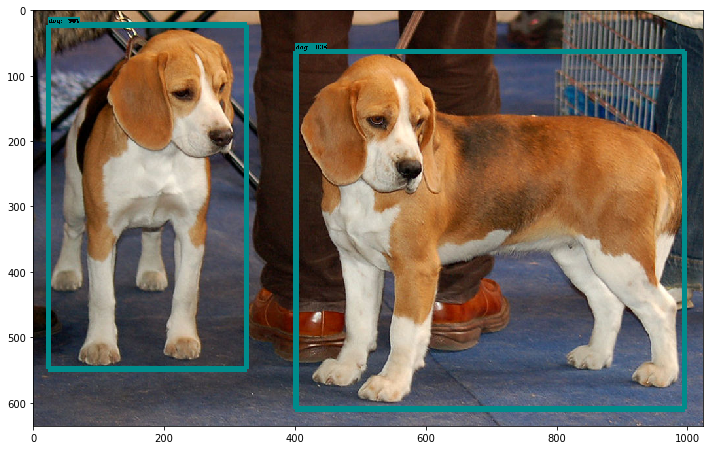

In [16]:
IMAGE_PATH = "images/image1.jpg"
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image = Image.open(IMAGE_PATH)
        # the array based representation of the image will be used later in order to prepare the
        # result image with boxes and labels on it.
        image_np = load_image_into_numpy_array(image)
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
            
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        # Actual detection.
        (boxes, scores, classes, num_detections) = sess.run(
            [boxes, scores, classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              line_thickness=8)
        
        plt.figure(figsize=IMAGE_SIZE)
        plt.imshow(image_np)